# 8.1 Execrise

# 1.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read with multi-index header
df_spx_data = pd.read_excel('spx_data_weekly.xlsx', sheet_name='spx data', header=[0, 1], index_col=0)

# Clean column names
df_spx_data.columns = pd.MultiIndex.from_tuples([
    (col[0] if pd.notna(col[0]) and 'Unnamed' not in str(col[0]) else None, 
     col[1] if pd.notna(col[1]) else None)
    for col in df_spx_data.columns
])

df_spx_data

A                               AAPL                  \
             PX_LAST EQY_DVD_YLD_IND PE_RATIO   PX_LAST EQY_DVD_YLD_IND   
date                                                                      
2015-07-03   36.4044          1.0988  27.4720   28.2589          1.8401   
2015-07-10   36.2388          1.1038  27.3471   27.5527          1.8873   
2015-07-17   36.7447          1.0886  27.7288   28.9696          1.7950   
2015-07-24   36.1560          1.1063  27.2846   27.8253          1.8688   
2015-07-31   37.6645          1.0620  26.6192   27.1101          1.9181   
...              ...             ...      ...       ...             ...   
2025-05-30  111.4610          0.8900  22.0155  200.4280          0.5189   
2025-06-06  115.3251          0.8602  22.7787  203.4916          0.5111   
2025-06-13  116.5999          0.8508  23.0305  196.0373          0.5305   
2025-06-20  115.0861          0.8620  22.7315  200.5777          0.5185   
2025-06-27  118.6813          0.8359  23.4416  200.6576          0.5183   

                         ABBV                             ABNB  ...      YUM  \
           PE_RATIO   PX_LAST EQY_DVD_YLD_IND PE_RATIO PX_LAST  ... PE_RATIO   
date                                                            ...            
2015-07-03  13.0592   44.2648          4.6086  11.9239     NaN  ...  18.6689   
2015-07-10  12.7328   44.9267          4.5407  12.1022     NaN  ...  18.5282   
2015-07-17  13.3876   45.7570          4.4583  12.3258     NaN  ...  18.0008   
2015-07-24  12.8588   44.5083          4.5834  11.9895     NaN  ...  17.7611   
2015-07-31  12.5283   45.7701          4.4571  12.3294     NaN  ...  17.9762   
...             ...       ...             ...      ...     ...  ...      ...   
2025-05-30  28.2604  183.1956          3.5809  23.7228  129.00  ...  26.0513   
2025-06-06  28.6924  186.8573          3.5107  24.1970  140.64  ...  26.2124   
2025-06-13  27.6413  188.0877          3.4877  24.3563  135.54  ...  26.0622   
2025-06-20  28.2815  182.3983          3.5965  23.6195  131.73  ...  25.1681   
2025-06-27  27.6305  179.4551          3.6555  23.2384  134.52  ...  26.8603   

                ZBH                             ZBRA                  \
            PX_LAST EQY_DVD_YLD_IND PE_RATIO PX_LAST EQY_DVD_YLD_IND   
date                                                                   
2015-07-03  96.5853          0.9111  18.2975  112.43             NaN   
2015-07-10  95.3533          0.9229  18.0642  109.75             NaN   
2015-07-17  95.9693          0.9170  18.1809  114.18             NaN   
2015-07-24  95.2194          0.9242  18.0388  110.89             NaN   
2015-07-31  92.9072          0.9472  17.6008  107.63             NaN   
...             ...             ...      ...     ...             ...   
2025-05-30  91.7072          1.0468  17.9771  289.77             NaN   
2025-06-06  91.9161          1.0444  18.0180  295.36             NaN   
2025-06-13  90.8216          1.0570  17.8035  283.61             NaN   
2025-06-20  90.7619          1.0577  17.7918  294.04             NaN   
2025-06-27  91.2367          1.0522  17.8848  309.26             NaN   

                           ZTS                           
            PE_RATIO   PX_LAST EQY_DVD_YLD_IND PE_RATIO  
date                                                     
2015-07-03  151.5166   44.5029          0.7460  26.8168  
2015-07-10  147.9049   43.2593          0.7675  26.0674  
2015-07-17  153.8750   44.0331          0.7540  26.5337  
2015-07-24  149.4412   45.5900          0.7282  27.4718  
2015-07-31  145.0478   45.1201          0.7358  27.1887  
...              ...       ...             ...      ...  
2025-05-30   27.0190  167.4848          1.1941  27.9582  
2025-06-06   27.5403  169.0044          1.1834  28.2119  
2025-06-13   26.4447  163.2140          1.2254  27.2453  
2025-06-20   27.4172  156.1026          1.2812  26.0582  
2025-06-27   28.5673  155.1094          1.2894  25.8924  

[522 rows x 1500 columns]

In [2]:
stock_tickers = [col[0] for col in df_spx_data.columns if col[0] is not None and col[1] == 'PX_LAST']

min_data_points = 5 * 52  # 260 weeks

valid_stocks = []
for stock in stock_tickers:
    price_col = (stock, 'PX_LAST')
    if price_col in df_spx_data.columns:
        price_data = df_spx_data[price_col]
        # Count non-null values
        non_null_count = price_data.notna().sum()
        if non_null_count >= min_data_points:
            valid_stocks.append(stock)

print(f"Total stocks: {len(stock_tickers)}")
print(f"Stocks with at least 5 years of data: {len(valid_stocks)}")
print(f"Stocks to remove: {len(stock_tickers) - len(valid_stocks)}")

valid_columns = [col for col in df_spx_data.columns 
                 if col[0] in valid_stocks]

df_spx_data_filtered = df_spx_data[valid_columns]

df_spx_data_filtered

Total stocks: 500
Stocks with at least 5 years of data: 485
Stocks to remove: 15


A                               AAPL                  \
             PX_LAST EQY_DVD_YLD_IND PE_RATIO   PX_LAST EQY_DVD_YLD_IND   
date                                                                      
2015-07-03   36.4044          1.0988  27.4720   28.2589          1.8401   
2015-07-10   36.2388          1.1038  27.3471   27.5527          1.8873   
2015-07-17   36.7447          1.0886  27.7288   28.9696          1.7950   
2015-07-24   36.1560          1.1063  27.2846   27.8253          1.8688   
2015-07-31   37.6645          1.0620  26.6192   27.1101          1.9181   
...              ...             ...      ...       ...             ...   
2025-05-30  111.4610          0.8900  22.0155  200.4280          0.5189   
2025-06-06  115.3251          0.8602  22.7787  203.4916          0.5111   
2025-06-13  116.5999          0.8508  23.0305  196.0373          0.5305   
2025-06-20  115.0861          0.8620  22.7315  200.5777          0.5185   
2025-06-27  118.6813          0.8359  23.4416  200.6576          0.5183   

                         ABBV                                ABT  ...  \
           PE_RATIO   PX_LAST EQY_DVD_YLD_IND PE_RATIO   PX_LAST  ...   
date                                                              ...   
2015-07-03  13.0592   44.2648          4.6086  11.9239   40.4951  ...   
2015-07-10  12.7328   44.9267          4.5407  12.1022   40.9213  ...   
2015-07-17  13.3876   45.7570          4.4583  12.3258   41.0942  ...   
2015-07-24  12.8588   44.5083          4.5834  11.9895   42.0413  ...   
2015-07-31  12.5283   45.7701          4.4571  12.3294   41.7448  ...   
...             ...       ...             ...      ...       ...  ...   
2025-05-30  28.2604  183.1956          3.5809  23.7228  132.3943  ...   
2025-06-06  28.6924  186.8573          3.5107  24.1970  132.3943  ...   
2025-06-13  27.6413  188.0877          3.4877  24.3563  134.4162  ...   
2025-06-20  28.2815  182.3983          3.5965  23.6195  131.8096  ...   
2025-06-27  27.6305  179.4551          3.6555  23.2384  133.1872  ...   

                YUM      ZBH                             ZBRA                  \
           PE_RATIO  PX_LAST EQY_DVD_YLD_IND PE_RATIO PX_LAST EQY_DVD_YLD_IND   
date                                                                            
2015-07-03  18.6689  96.5853          0.9111  18.2975  112.43             NaN   
2015-07-10  18.5282  95.3533          0.9229  18.0642  109.75             NaN   
2015-07-17  18.0008  95.9693          0.9170  18.1809  114.18             NaN   
2015-07-24  17.7611  95.2194          0.9242  18.0388  110.89             NaN   
2015-07-31  17.9762  92.9072          0.9472  17.6008  107.63             NaN   
...             ...      ...             ...      ...     ...             ...   
2025-05-30  26.0513  91.7072          1.0468  17.9771  289.77             NaN   
2025-06-06  26.2124  91.9161          1.0444  18.0180  295.36             NaN   
2025-06-13  26.0622  90.8216          1.0570  17.8035  283.61             NaN   
2025-06-20  25.1681  90.7619          1.0577  17.7918  294.04             NaN   
2025-06-27  26.8603  91.2367          1.0522  17.8848  309.26             NaN   

                           ZTS                           
            PE_RATIO   PX_LAST EQY_DVD_YLD_IND PE_RATIO  
date                                                     
2015-07-03  151.5166   44.5029          0.7460  26.8168  
2015-07-10  147.9049   43.2593          0.7675  26.0674  
2015-07-17  153.8750   44.0331          0.7540  26.5337  
2015-07-24  149.4412   45.5900          0.7282  27.4718  
2015-07-31  145.0478   45.1201          0.7358  27.1887  
...              ...       ...             ...      ...  
2025-05-30   27.0190  167.4848          1.1941  27.9582  
2025-06-06   27.5403  169.0044          1.1834  28.2119  
2025-06-13   26.4447  163.2140          1.2254  27.2453  
2025-06-20   27.4172  156.1026          1.2812  26.0582  
2025-06-27   28.5673  155.1094          1.2894  25.8924 

# 1.1

In [3]:
# Extract all dividend yield columns
dividend_yield_cols = [col for col in df_spx_data_filtered.columns 
                       if col[1] == 'EQY_DVD_YLD_IND']

# Create a DataFrame with just dividend yields (stock names as columns)
# Use pd.concat instead of repeated column assignment to avoid fragmentation
div_yield_df = pd.concat(
    [df_spx_data_filtered[col] for col in dividend_yield_cols], 
    axis=1, 
    keys=[col[0] for col in dividend_yield_cols]
)

# Flatten the column names (remove the extra level if created)
if isinstance(div_yield_df.columns, pd.MultiIndex):
    div_yield_df.columns = div_yield_df.columns.get_level_values(0)

# Ensure index is datetime
div_yield_df.index = pd.to_datetime(div_yield_df.index)

# Calculate 1-year rolling average (52 weeks for weekly data)
rolling_window = 52  # 52 weeks = 1 year
div_yield_rolling_avg = div_yield_df.rolling(window=rolling_window, min_periods=1).mean()

# For each date, find highest and lowest dividend-yielding stocks
results = []
for date in div_yield_rolling_avg.index:
    date_data = div_yield_rolling_avg.loc[date]
    
    # Remove NaN values
    valid_data = date_data.dropna()
    
    if len(valid_data) > 0:
        # Find highest and lowest
        highest_stock = valid_data.idxmax()
        highest_yield = valid_data.max()
        lowest_stock = valid_data.idxmin()
        lowest_yield = valid_data.min()
        
        results.append({
            'Date': date,
            'Highest_Yield_Stock': highest_stock,
            'Highest_Yield': highest_yield,
            'Lowest_Yield_Stock': lowest_stock,
            'Lowest_Yield': lowest_yield
        })

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df.set_index('Date', inplace=True)

# Display summary
print("Summary Statistics:")
print(f"Total dates analyzed: {len(results_df)}")
print(f"\nMost frequent highest-yield stock: {results_df['Highest_Yield_Stock'].mode()[0]}")
print(f"Most frequent lowest-yield stock: {results_df['Lowest_Yield_Stock'].mode()[0]}")
print(f"\nAverage highest yield: {results_df['Highest_Yield'].mean():.4f}")
print(f"Average lowest yield: {results_df['Lowest_Yield'].mean():.4f}")
print(f"\nMaximum yield observed: {results_df['Highest_Yield'].max():.4f}")
print(f"Minimum yield observed: {results_df['Lowest_Yield'].min():.4f}")

Summary Statistics:
Total dates analyzed: 522

Most frequent highest-yield stock: DD
Most frequent lowest-yield stock: COO

Average highest yield: 14.7825
Average lowest yield: 0.0226

Maximum yield observed: 23.5776
Minimum yield observed: 0.0147


# 1.2 / 1.4

CARRY STRATEGY RESULTS

Strategy: Long top 20% of stocks by dividend yield
Equal weights: 0.01 per stock
Total observations: 521
Sample period: 2015-07-03 to 2025-06-20

------------------------------------------------------------
ANNUALIZED STATISTICS
------------------------------------------------------------
Mean (annualized):        0.1123 (11.23%)
Volatility (annualized):  0.1614 (16.14%)
Sharpe Ratio:             0.6955

------------------------------------------------------------
TAIL-RISK STATISTICS
------------------------------------------------------------
Skewness:                 0.1355
VaR (5th quantile):       -0.0283 (-2.83%)
CVaR (5th quantile):      -0.0499 (-4.99%)
Max Drawdown:             -0.3512 (-35.12%)

------------------------------------------------------------
ADDITIONAL STATISTICS
------------------------------------------------------------
Min return:               -0.1501 (-15.01%)
Max return:               0.1837 (18.37%)
Median return:            0.002

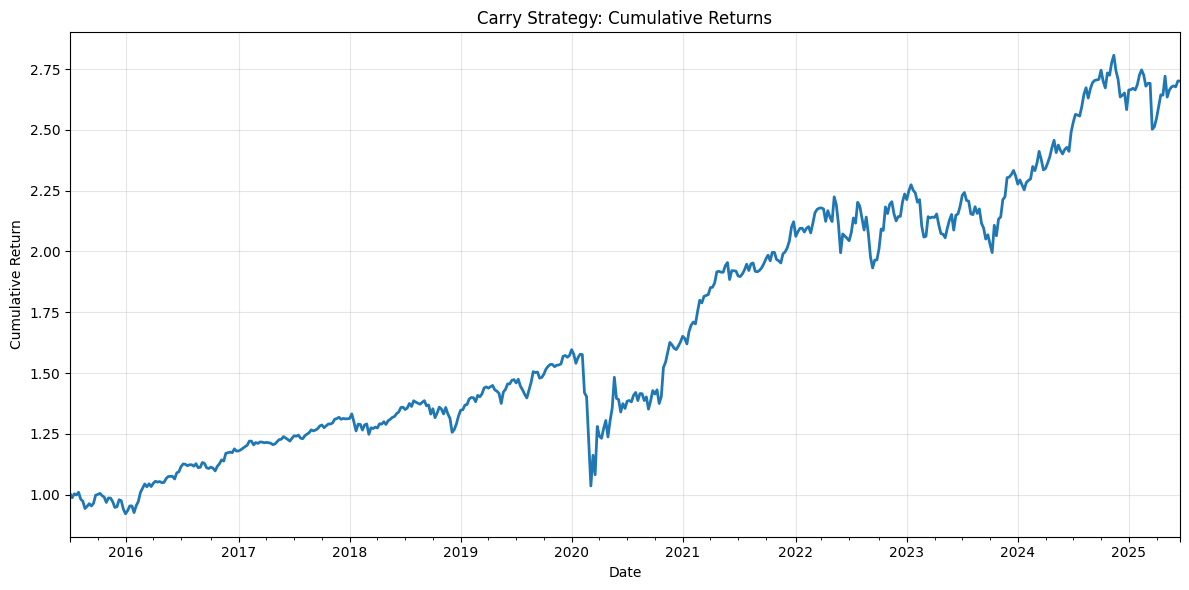

2015-07-03    0.004292
2015-07-10   -0.017369
2015-07-17    0.016807
2015-07-24   -0.005034
2015-07-31    0.011367
                ...   
2025-05-23    0.004941
2025-05-30    0.001575
2025-06-06   -0.001415
2025-06-13    0.009013
2025-06-20    0.000000
Length: 521, dtype: float64

In [4]:
# Carry Strategy Implementation

# 1. Extract price data to calculate returns
price_cols = [col for col in df_spx_data_filtered.columns 
              if col[1] == 'PX_LAST']

# Create price DataFrame
price_df = pd.concat(
    [df_spx_data_filtered[col] for col in price_cols], 
    axis=1, 
    keys=[col[0] for col in price_cols]
)

# Flatten column names if needed
if isinstance(price_df.columns, pd.MultiIndex):
    price_df.columns = price_df.columns.get_level_values(0)

# Ensure index is datetime
price_df.index = pd.to_datetime(price_df.index)
div_yield_df.index = pd.to_datetime(div_yield_df.index)

# Align price and dividend yield data
common_stocks = list(set(price_df.columns) & set(div_yield_df.columns))
price_df = price_df[common_stocks]
div_yield_df = div_yield_df[common_stocks]

# Calculate returns: r_(t+1) = (P_(t+1) - P_t) / P_t
returns_df = price_df.pct_change().shift(-1)  # Shift to get r_(t+1) at time t

# 2. Implement carry strategy
portfolio_returns = []
portfolio_weights_history = []

# Sort dates
dates = sorted(div_yield_df.index)

# Start from beginning of sample
for i in range(len(dates) - 1):  # -1 because we need r_(t+1)
    t = dates[i]
    t_next = dates[i + 1]
    
    # Get dividend yields at time t
    div_yields_t = div_yield_df.loc[t]
    
    # Remove NaN values
    valid_yields = div_yields_t.dropna()
    
    if len(valid_yields) == 0:
        portfolio_returns.append(np.nan)
        portfolio_weights_history.append({})
        continue
    
    # Rank stocks by dividend yield (highest first)
    ranked_stocks = valid_yields.sort_values(ascending=False)
    
    # Select top 20% of stocks
    n_stocks = len(ranked_stocks)
    n_select = max(1, int(np.ceil(n_stocks * 0.20)))  # Top 20%, at least 1 stock
    selected_stocks = ranked_stocks.head(n_select).index.tolist()
    
    # Equal weights: 0.01 per stock
    weight_per_stock = 0.01
    weights = {stock: weight_per_stock for stock in selected_stocks}
    
    # Get returns for t+1
    if t_next in returns_df.index:
        returns_t1 = returns_df.loc[t_next, selected_stocks]
        
        # Calculate portfolio return: sum of weights * returns
        portfolio_return = (returns_t1 * weight_per_stock).sum()
        
        portfolio_returns.append(portfolio_return)
        portfolio_weights_history.append(weights)
    else:
        portfolio_returns.append(np.nan)
        portfolio_weights_history.append(weights)

# Create portfolio returns series
portfolio_returns_series = pd.Series(portfolio_returns, index=dates[:-1])

# Remove NaN values for statistics
portfolio_returns_clean = portfolio_returns_series.dropna()

# 3. Calculate annualized statistics
# Weekly data: multiply by 52 for annualization
n_periods_per_year = 52

# Mean (annualized)
mean_weekly = portfolio_returns_clean.mean()
mean_annualized = mean_weekly * n_periods_per_year

# Volatility (annualized)
vol_weekly = portfolio_returns_clean.std()
vol_annualized = vol_weekly * np.sqrt(n_periods_per_year)

# Sharpe ratio (assuming risk-free rate = 0, or annualize appropriately)
sharpe_annualized = mean_annualized / vol_annualized if vol_annualized > 0 else np.nan

# 4. Calculate tail-risk statistics
# Skewness
skewness = portfolio_returns_clean.skew()

# VaR (5th quantile) - Value at Risk
var_5th = portfolio_returns_clean.quantile(0.05)

# CVaR (5th quantile) - Conditional Value at Risk (Expected Shortfall)
cvar_5th = portfolio_returns_clean[portfolio_returns_clean <= var_5th].mean()

# Max Drawdown
cumulative_returns = (1 + portfolio_returns_clean).cumprod()
running_max = cumulative_returns.expanding().max()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()

# 5. Report results
print("="*60)
print("CARRY STRATEGY RESULTS")
print("="*60)
print(f"\nStrategy: Long top 20% of stocks by dividend yield")
print(f"Equal weights: 0.01 per stock")
print(f"Total observations: {len(portfolio_returns_clean)}")
print(f"Sample period: {portfolio_returns_clean.index[0].date()} to {portfolio_returns_clean.index[-1].date()}")

print("\n" + "-"*60)
print("ANNUALIZED STATISTICS")
print("-"*60)
print(f"Mean (annualized):        {mean_annualized:.4f} ({mean_annualized*100:.2f}%)")
print(f"Volatility (annualized):  {vol_annualized:.4f} ({vol_annualized*100:.2f}%)")
print(f"Sharpe Ratio:             {sharpe_annualized:.4f}")

print("\n" + "-"*60)
print("TAIL-RISK STATISTICS")
print("-"*60)
print(f"Skewness:                 {skewness:.4f}")
print(f"VaR (5th quantile):       {var_5th:.4f} ({var_5th*100:.2f}%)")
print(f"CVaR (5th quantile):      {cvar_5th:.4f} ({cvar_5th*100:.2f}%)")
print(f"Max Drawdown:             {max_drawdown:.4f} ({max_drawdown*100:.2f}%)")

# Additional statistics
print("\n" + "-"*60)
print("ADDITIONAL STATISTICS")
print("-"*60)
print(f"Min return:               {portfolio_returns_clean.min():.4f} ({portfolio_returns_clean.min()*100:.2f}%)")
print(f"Max return:               {portfolio_returns_clean.max():.4f} ({portfolio_returns_clean.max()*100:.2f}%)")
print(f"Median return:            {portfolio_returns_clean.median():.4f} ({portfolio_returns_clean.median()*100:.2f}%)")
print(f"Kurtosis:                 {portfolio_returns_clean.kurtosis():.4f}")

# Show portfolio returns series
print("\n" + "-"*60)
print("PORTFOLIO RETURNS (first 10 and last 10)")
print("-"*60)
print(portfolio_returns_clean.head(10))
print("\n...")
print(portfolio_returns_clean.tail(10))

# Optional: Plot cumulative returns
plt.figure(figsize=(12, 6))
cumulative_returns.plot(title='Carry Strategy: Cumulative Returns', linewidth=2)
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Store results
portfolio_returns_series

# 1.3 / 1.4

LONG-SHORT CARRY STRATEGY RESULTS

Strategy: Long top 20% and short bottom 20% of stocks by dividend yield
Equal weights: +0.01 per long position, -0.01 per short position
Total observations: 521
Sample period: 2015-07-03 to 2025-06-20

------------------------------------------------------------
ANNUALIZED STATISTICS
------------------------------------------------------------
Mean (annualized):        -0.0099 (-0.99%)
Volatility (annualized):  0.0935 (9.35%)
Sharpe Ratio:             -0.1061

------------------------------------------------------------
TAIL-RISK STATISTICS
------------------------------------------------------------
Skewness:                 0.6850
VaR (5th quantile):       -0.0183 (-1.83%)
CVaR (5th quantile):      -0.0277 (-2.77%)
Max Drawdown:             -0.2663 (-26.63%)

------------------------------------------------------------
ADDITIONAL STATISTICS
------------------------------------------------------------
Min return:               -0.0540 (-5.40%)
Max re

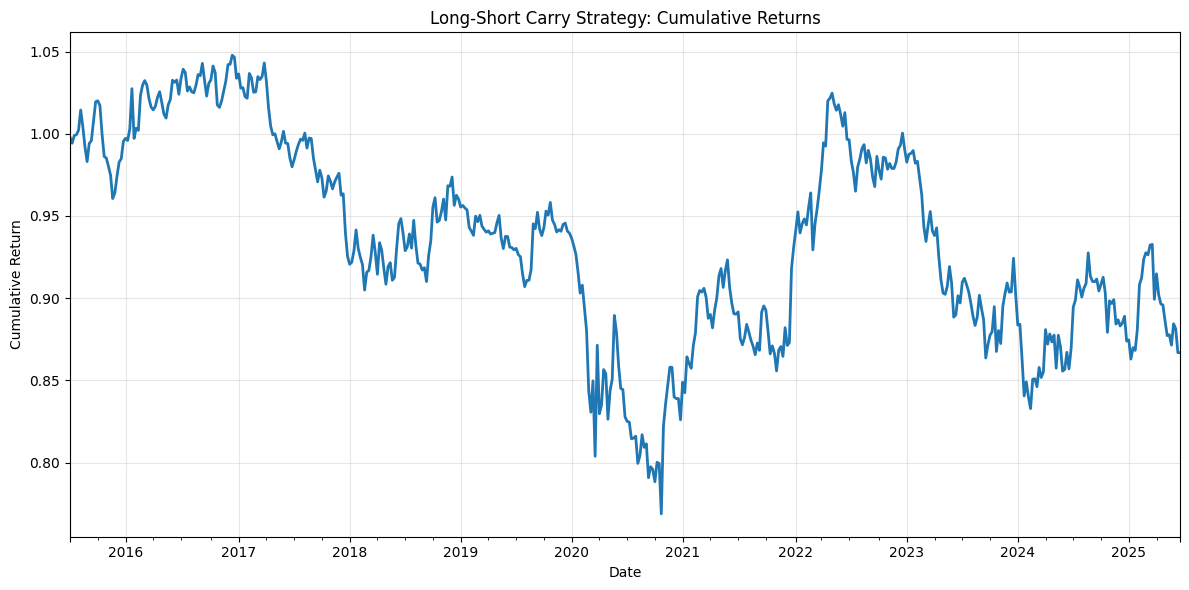

2015-07-03   -0.002141
2015-07-10   -0.003585
2015-07-17    0.004746
2015-07-24    0.000424
2015-07-31    0.002815
                ...   
2025-05-23   -0.007206
2025-05-30    0.014905
2025-06-06   -0.003444
2025-06-13   -0.016470
2025-06-20    0.000000
Length: 521, dtype: float64

In [5]:
# Long-Short Carry Strategy Implementation

# 1. Extract price data to calculate returns (reuse from before if already done)
price_cols = [col for col in df_spx_data_filtered.columns 
              if col[1] == 'PX_LAST']

# Create price DataFrame
price_df = pd.concat(
    [df_spx_data_filtered[col] for col in price_cols], 
    axis=1, 
    keys=[col[0] for col in price_cols]
)

# Flatten column names if needed
if isinstance(price_df.columns, pd.MultiIndex):
    price_df.columns = price_df.columns.get_level_values(0)

# Ensure index is datetime
price_df.index = pd.to_datetime(price_df.index)
div_yield_df.index = pd.to_datetime(div_yield_df.index)

# Align price and dividend yield data
common_stocks = list(set(price_df.columns) & set(div_yield_df.columns))
price_df = price_df[common_stocks]
div_yield_df = div_yield_df[common_stocks]

# Calculate returns: r_(t+1) = (P_(t+1) - P_t) / P_t
returns_df = price_df.pct_change().shift(-1)  # Shift to get r_(t+1) at time t

# 2. Implement long-short carry strategy
portfolio_returns = []
portfolio_weights_history = []

# Sort dates
dates = sorted(div_yield_df.index)

# Start from beginning of sample
for i in range(len(dates) - 1):  # -1 because we need r_(t+1)
    t = dates[i]
    t_next = dates[i + 1]
    
    # Get dividend yields at time t
    div_yields_t = div_yield_df.loc[t]
    
    # Remove NaN values
    valid_yields = div_yields_t.dropna()
    
    if len(valid_yields) == 0:
        portfolio_returns.append(np.nan)
        portfolio_weights_history.append({})
        continue
    
    # Rank stocks by dividend yield (highest first)
    ranked_stocks = valid_yields.sort_values(ascending=False)
    
    # Select top 20% for long positions
    n_stocks = len(ranked_stocks)
    n_select = max(1, int(np.ceil(n_stocks * 0.20)))  # Top 20%, at least 1 stock
    long_stocks = ranked_stocks.head(n_select).index.tolist()
    
    # Select bottom 20% for short positions
    short_stocks = ranked_stocks.tail(n_select).index.tolist()
    
    # Equal weights: +0.01 for long, -0.01 for short
    weights = {}
    for stock in long_stocks:
        weights[stock] = 0.01  # Long position
    for stock in short_stocks:
        weights[stock] = -0.01  # Short position
    
    # Get returns for t+1
    if t_next in returns_df.index:
        # Get returns for both long and short positions
        all_selected_stocks = long_stocks + short_stocks
        returns_t1 = returns_df.loc[t_next, all_selected_stocks]
        
        # Calculate portfolio return:
        # Long positions: +0.01 * return
        # Short positions: -0.01 * return (we profit when stock goes down)
        portfolio_return = 0.0
        for stock in long_stocks:
            if stock in returns_t1.index and not pd.isna(returns_t1[stock]):
                portfolio_return += 0.01 * returns_t1[stock]
        for stock in short_stocks:
            if stock in returns_t1.index and not pd.isna(returns_t1[stock]):
                portfolio_return += -0.01 * returns_t1[stock]  # Negative weight for short
        
        portfolio_returns.append(portfolio_return)
        portfolio_weights_history.append(weights)
    else:
        portfolio_returns.append(np.nan)
        portfolio_weights_history.append(weights)

# Create portfolio returns series
portfolio_returns_series = pd.Series(portfolio_returns, index=dates[:-1])

# Remove NaN values for statistics
portfolio_returns_clean = portfolio_returns_series.dropna()

# 3. Calculate annualized statistics
# Weekly data: multiply by 52 for annualization
n_periods_per_year = 52

# Mean (annualized)
mean_weekly = portfolio_returns_clean.mean()
mean_annualized = mean_weekly * n_periods_per_year

# Volatility (annualized)
vol_weekly = portfolio_returns_clean.std()
vol_annualized = vol_weekly * np.sqrt(n_periods_per_year)

# Sharpe ratio (assuming risk-free rate = 0, or annualize appropriately)
sharpe_annualized = mean_annualized / vol_annualized if vol_annualized > 0 else np.nan

# 4. Calculate tail-risk statistics
# Skewness
skewness = portfolio_returns_clean.skew()

# VaR (5th quantile) - Value at Risk
var_5th = portfolio_returns_clean.quantile(0.05)

# CVaR (5th quantile) - Conditional Value at Risk (Expected Shortfall)
cvar_5th = portfolio_returns_clean[portfolio_returns_clean <= var_5th].mean()

# Max Drawdown
cumulative_returns = (1 + portfolio_returns_clean).cumprod()
running_max = cumulative_returns.expanding().max()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()

# 5. Report results
print("="*60)
print("LONG-SHORT CARRY STRATEGY RESULTS")
print("="*60)
print(f"\nStrategy: Long top 20% and short bottom 20% of stocks by dividend yield")
print(f"Equal weights: +0.01 per long position, -0.01 per short position")
print(f"Total observations: {len(portfolio_returns_clean)}")
print(f"Sample period: {portfolio_returns_clean.index[0].date()} to {portfolio_returns_clean.index[-1].date()}")

print("\n" + "-"*60)
print("ANNUALIZED STATISTICS")
print("-"*60)
print(f"Mean (annualized):        {mean_annualized:.4f} ({mean_annualized*100:.2f}%)")
print(f"Volatility (annualized):  {vol_annualized:.4f} ({vol_annualized*100:.2f}%)")
print(f"Sharpe Ratio:             {sharpe_annualized:.4f}")

print("\n" + "-"*60)
print("TAIL-RISK STATISTICS")
print("-"*60)
print(f"Skewness:                 {skewness:.4f}")
print(f"VaR (5th quantile):       {var_5th:.4f} ({var_5th*100:.2f}%)")
print(f"CVaR (5th quantile):      {cvar_5th:.4f} ({cvar_5th*100:.2f}%)")
print(f"Max Drawdown:             {max_drawdown:.4f} ({max_drawdown*100:.2f}%)")

# Additional statistics
print("\n" + "-"*60)
print("ADDITIONAL STATISTICS")
print("-"*60)
print(f"Min return:               {portfolio_returns_clean.min():.4f} ({portfolio_returns_clean.min()*100:.2f}%)")
print(f"Max return:               {portfolio_returns_clean.max():.4f} ({portfolio_returns_clean.max()*100:.2f}%)")
print(f"Median return:            {portfolio_returns_clean.median():.4f} ({portfolio_returns_clean.median()*100:.2f}%)")
print(f"Kurtosis:                 {portfolio_returns_clean.kurtosis():.4f}")

# Show portfolio returns series
print("\n" + "-"*60)
print("PORTFOLIO RETURNS (first 10 and last 10)")
print("-"*60)
print(portfolio_returns_clean.head(10))
print("\n...")
print(portfolio_returns_clean.tail(10))

# Optional: Plot cumulative returns
plt.figure(figsize=(12, 6))
cumulative_returns.plot(title='Long-Short Carry Strategy: Cumulative Returns', linewidth=2)
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Store results
portfolio_returns_series

# Case study

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_exibit2 = pd.read_excel('ltcm_exhibits_data.xlsx', sheet_name='Exhibit 2')

df_ltcm_data = df_exibit2.iloc[3:56]
df_ltcm_data = df_ltcm_data.rename(columns={'Exhibit 2 Fund Capital and Monthly Returns (June, 1994 to July, 1998)	': 'Date', 
    'Unnamed: 1': 'Fund Capital ($billions)',
    'Unnamed: 2': 'Gross Monthly Performance',
    'Unnamed: 3': 'Net Monthly Performance',
    'Unnamed: 4': 'Index of Net Performance',
    })
df_ltcm_data.reset_index(drop=True, inplace=True)

df_ltcm_data

,"Exhibit 2 Fund Capital and Monthly Returns (June, 1994 to July, 1998)",Fund Capital ($billions),Gross Monthly Performance,Net Monthly Performance,Index of Net Performance
0,1994-03-01 00:00:00,1.1,-0.011,-0.013,0.99
1,1994-04-01 00:00:00,1.1,0.014,0.008,1
2,1994-05-01 00:00:00,1.2,0.068,0.053,1.05
3,1994-06-01 00:00:00,1.2,-0.039,-0.029,1.02
4,1994-07-01 00:00:00,1.4,0.116,0.084,1.1
5,1994-08-01 00:00:00,1.5,0.038,0.03,1.14
6,1994-09-01 00:00:00,1.5,-0.004,-0.003,1.13
7,1994-10-01 00:00:00,1.5,0.01,0.004,1.14
8,1994-11-01 00:00:00,1.6,0.077,0.061,1.21
9,1994-12-01 00:00:00,1.6,-0.008,-0.005,1.2


# 1. Summary

In [7]:
gross_returns = pd.to_numeric(df_ltcm_data['Gross Monthly Performance'])
net_returns = pd.to_numeric(df_ltcm_data['Net Monthly Performance'])

print('Gross Performance')

gross_mean_monthly = gross_returns.mean()
gross_mean_annualized = gross_mean_monthly * 12
print(f"Annualized Mean: {gross_mean_annualized:.4f}")

gross_vol_monthly = gross_returns.std()
gross_vol_annualized = gross_vol_monthly * np.sqrt(12)
print(f"Annualized Volatility: {gross_vol_annualized:.4f}")

gross_sharpe = gross_mean_annualized / gross_vol_annualized
print(f"Sharpe Ratio: {gross_sharpe:.4f}")

# Skewness
gross_skewness = gross_returns.skew()
print(f"Skewness: {gross_skewness:.4f}")

# Kurtosis
gross_kurtosis = gross_returns.kurt()
print(f"Kurtosis: {gross_kurtosis:.4f}")

# 5th quantile (5th percentile)
gross_5th_quantile = gross_returns.quantile(0.05)
print(f"5th Quantile: {gross_5th_quantile:.4f}")

print('Net Performance')

net_mean_monthly = net_returns.mean()
net_mean_annualized = net_mean_monthly * 12
print(f"Annualized Mean: {net_mean_annualized:.4f}")

net_vol_monthly = net_returns.std()
net_vol_annualized = net_vol_monthly * np.sqrt(12)
print(f"Annualized Volatility: {net_vol_annualized:.4f}")

net_sharpe = net_mean_annualized / net_vol_annualized
print(f"Sharpe Ratio: {net_sharpe:.4f}")

# Skewness
net_skewness = net_returns.skew()
print(f"Skewness: {net_skewness:.4f}")

# Kurtosis
net_kurtosis = net_returns.kurt()
print(f"Kurtosis: {net_kurtosis:.4f}")

# 5th quantile (5th percentile)
net_5th_quantile = net_returns.quantile(0.05)
print(f"5th Quantile: {net_5th_quantile:.4f}")

Gross Performance
Annualized Mean: 0.2939
Annualized Volatility: 0.1364
Sharpe Ratio: 2.1553
Skewness: -0.2964
Kurtosis: 1.5694
5th Quantile: -0.0264
Net Performance
Annualized Mean: 0.2072
Annualized Volatility: 0.1119
Sharpe Ratio: 1.8513
Skewness: -0.8179
Kurtosis: 2.9055
5th Quantile: -0.0224


# 2. Relative to SPY

[based on a similar analysis as above but for SPY data]

LTCM outperformed SPY on mean return and sharpe metrics, even after fees. The gross Sharpe of 2.16 is high for a hedge fund.

LTCM gross volatility was higher than SPY while net volatility was similar. The fund generated higher returns with comparable risk.

LTCM had smaller left-tail losses than SPY, suggesting better downside protection.

# 3. LFD

In [8]:
df_spy = pd.read_excel('spy_data.xlsx', sheet_name='excess returns')
df_spy = df_spy.dropna()
df_spy.reset_index(drop=True, inplace=True)
df_spy_filtered = df_spy[(df_spy['date'] >= '1994-02-15') & (df_spy['date'] <= '1998-07-01')]

spy_returns = pd.to_numeric(df_spy_filtered['SPY'])
net_returns = pd.to_numeric(df_ltcm_data['Net Monthly Performance'])

X = spy_returns.values
y = net_returns.values

X_with_intercept = np.column_stack([np.ones(len(X)), X])

# (X'X)^(-1)X'y
coefficients = np.linalg.lstsq(X_with_intercept, y, rcond=None)[0]
alpha_monthly = coefficients[0]
beta = coefficients[1]

y_pred = alpha_monthly + beta * X
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

alpha_annualized = alpha_monthly * 12

print(f"Alpha: {alpha_annualized:.4f}")
print(f"Beta: {beta:.4f}")
print(f"R-squared: {r_squared:.4f}")

Alpha: 0.2024
Beta: 0.0318
R-squared: 0.0011


Yes. High alpha of 20.24% annualized excess return after controlling for SPY exposure. Also near-zero beta and very low R-squared show returns are not driven by equity market movements.

# 4. Nonlinear Exposure

In [9]:
from scipy import stats
from scipy.linalg import lstsq

spy_returns = pd.to_numeric(df_spy_filtered['SPY'])
net_returns = pd.to_numeric(df_ltcm_data['Net Monthly Performance'])

net_returns_clean = net_returns.dropna()
spy_returns_clean = spy_returns.dropna()

min_length = min(len(net_returns_clean), len(spy_returns_clean))
net_returns_aligned = net_returns_clean.iloc[:min_length]
spy_returns_aligned = spy_returns_clean.iloc[:min_length]

# Model: net_returns = α + β_linear * spy_returns + β_quad * (spy_returns)^2 + ε
X = spy_returns_aligned.values
y = net_returns_aligned.values

X_quad = np.column_stack([
    np.ones(len(X)),     
    X,                   
    X ** 2               
])

coefficients, residuals, rank, s = lstsq(X_quad, y)
alpha_monthly = coefficients[0]
beta_linear = coefficients[1]
beta_quad = coefficients[2]

y_pred = alpha_monthly + beta_linear * X + beta_quad * (X ** 2)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

alpha_annualized = alpha_monthly * 12

print(f"Annualized Alpha: {alpha_annualized:.4f}")
print(f"Linear Beta: {beta_linear:.4f}")
print(f"Quadratic Beta: {beta_quad:.4f}")
print(f"R-squared: {r_squared:.4f}")


Annualized Alpha: 0.2555
Linear Beta: 0.0820
Quadratic Beta: -4.0683
R-squared: 0.0263


# 5. Analysis

1. The quadratic term adds explanatory power, but the market still explains only 2.63% of LTCM’s return variation.

2. Short options evident by large negative quadratic beta. 

3. Negatively exposed. Due to large negative quad beta. 


# 6. Pin pointing nature of exposure

In [10]:
spy_returns = pd.to_numeric(df_spy_filtered['SPY'])
net_returns = pd.to_numeric(df_ltcm_data['Net Monthly Performance'])

# Model: net_returns = α + β × SPY + β_u × max(SPY - k1, 0) + β_d × max(k2 - SPY, 0) + ε
# where k1 = 0.03 and k2 = -0.03

X = spy_returns.values
y = net_returns.values

k1 = 0.03
k2 = -0.03

# This is positive only when SPY > 3%
up_market = np.maximum(X - k1, 0)

# This is positive only when SPY < -3%
down_market = np.maximum(k2 - X, 0)

X_piecewise = np.column_stack([
    np.ones(len(X)),      
    X,                    
    up_market,            
    down_market           
])

coefficients, residuals, rank, s = lstsq(X_piecewise, y)
alpha_monthly = coefficients[0]
beta_market = coefficients[1]
beta_up = coefficients[2]
beta_down = coefficients[3]

y_pred = alpha_monthly + beta_market * X + beta_up * up_market + beta_down * down_market
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

alpha_annualized = alpha_monthly * 12

print(f"Annualized Alpha {alpha_annualized:.4f}")
print(f"Market Beta: {beta_market:.4f}")
print(f"Up-Market Beta: {beta_up:.4f}")
print(f"Down-Market Beta: {beta_down:.4f}")
print(f"R-squared: {r_squared:.4f}")

Annualized Alpha 0.2035
Market Beta: 0.2831
Up-Market Beta: -0.8272
Down-Market Beta: 0.5366
R-squared: 0.0354


# 7. Interpretation

1. Call-like factor (max(SPY - 0.03, 0)). Here beta is -0.8272 meaning LTCM is short the call like factor. 

    For Put-like factor (max(-0.03 - SPY, 0)) beta is 0.5366 meaning LTCM is long the put like factor.

2. Taking the abs of two betas the call factor (0.8272) moves LTCM more. strong up moves have more impact than strong down moves. 

3. LTCM’s negative volatility exposure comes primarily from being short the market’s upside (short call-like factor). The long put-like factor provides some offset, but the short call exposure dominates.